https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9

In [51]:
# Let's start with calling all dependencies that we will use for this exercise 
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API

### Data Collection and Exploration

In [52]:
# define the ticker to be used
nio = yf.Ticker('NIO')

# display the stcok information
nio.info

{'address1': 'Building 20',
 'address2': 'No. 56 AnTuo Road Anting Town Jiading District',
 'city': 'Shanghai',
 'zip': '201804',
 'country': 'China',
 'phone': '86 21 6908 2018',
 'website': 'https://www.nio.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'NIO Inc. designs, develops, manufactures, and sells smart electric vehicles in China. It offers five and six-seater electric SUVs, as well as smart electric sedans. The company also offers power solutions, including Power Home, a home charging solution; Power Swap, a battery swapping service; Power Charger and Destination Charger; Power Mobile, a mobile charging service through charging vans; Power Map, an application that provides access to a network of public chargers and their real-time information; and One Click for Power valet service. In addition, it provides repair, maintenance, and bodywork services through its NIO service centers and aut

### Data Preparation and Cleaning

In [53]:
history = nio.history(period='Max')
df = pd.DataFrame(history)
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0
2018-09-19 00:00:00-04:00,7.88,9.15,7.54,8.50,48306500,0.0,0.0
2018-09-20 00:00:00-04:00,9.07,9.47,8.42,8.78,40275000,0.0,0.0
2018-09-21 00:00:00-04:00,9.05,9.07,8.50,8.59,15118500,0.0,0.0
2018-09-24 00:00:00-04:00,8.32,8.39,7.85,7.87,16297900,0.0,0.0


In [54]:
# defining x and y
x = df.index
y = df.Close

In [55]:
# data exploration
def df_plot(data, x, y, title='', xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(8,3), dpi=dpi)
    plt.plot(x,y,color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

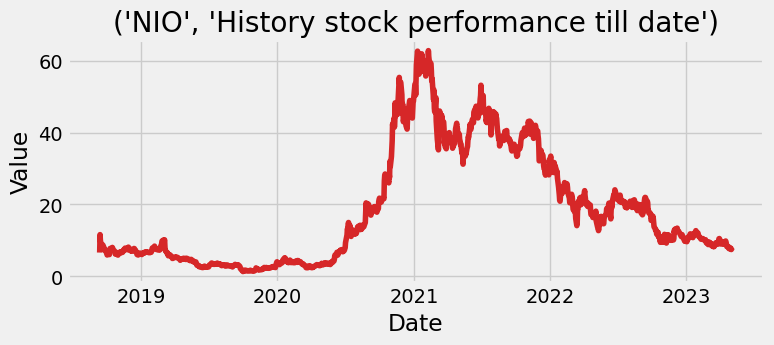

In [56]:
stock_name= "NIO"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [57]:
# data processing and scaling
df.reset_index(inplace=True)
df.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.6,66849000,0.0,0.0
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.6,158346500,0.0,0.0


In [58]:
df.columns=['date','open','high','low','close','vol','divs','split']
df.drop(columns=['divs', 'split']).head(2)

,date,open,high,low,close,vol
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.6,66849000
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.6,158346500


In [59]:
df['date'] = pd.to_datetime(df.date)
df.describe()

,open,high,low,close,vol,divs,split
count,1170.000000,1170.000000,1170.000000,1170.000000,1.170000e+03,1170.0,1170.0
mean,18.456103,19.036744,17.810453,18.434368,6.320908e+07,0.0,0.0
std,15.874365,16.317623,15.342359,15.846611,5.927664e+07,0.0,0.0
min,1.190000,1.450000,1.190000,1.320000,5.111000e+06,0.0,0.0
25%,5.220000,5.312500,4.992500,5.117500,3.108395e+07,0.0,0.0
50%,12.235000,12.630000,11.705000,12.095000,4.888765e+07,0.0,0.0
75%,30.217501,31.522500,29.567500,30.400000,7.363438e+07,0.0,0.0
max,64.949997,66.989998,62.189999,62.840000,5.771851e+08,0.0,0.0


In [60]:
print(len(df))

1170


In [61]:
x = df[['open', 'high', 'low', 'vol']]
y = df['close']

### Data split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(994, 4)
(176, 4)
(994,)
(176,)


### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

regression = LinearRegression()
regression.fit(x_train, y_train)
print('regression coefficients: ', regression.coef_)
print('regression intercept: ', regression.intercept_)

regression coefficients:  [-6.62016188e-01  9.52382624e-01  7.04636404e-01 -2.00153005e-10]
regression intercept:  -0.012138896439083169


### Prediction and Estimation

Here we will compute the coefficient of determination denoted by R², which takes values between 0 and 1, the higher the value R² the more successful the linear regression is at explaining the variation of Y values.

In [64]:
# the coefficient of determination R²
regression_confidence = regression.score(x_test, y_test)
print('linear regression confidence: ', regression_confidence)

linear regression confidence:  0.9958028305154111


In [65]:
predicted = regression.predict(x_test)

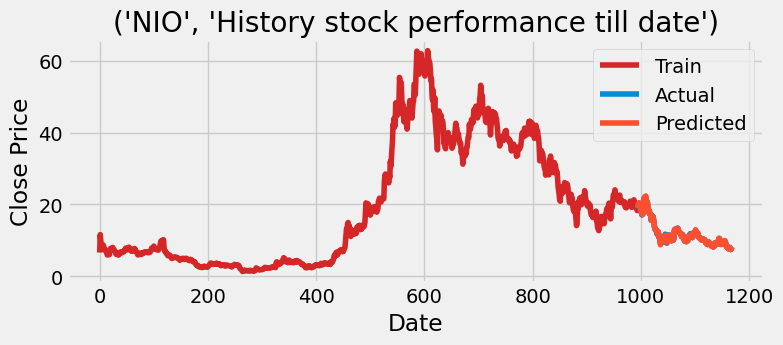

In [67]:
plt.figure(figsize=(8,3))
plt.plot(df.close,color='tab:red', label='Train')
plt.plot(y_test, label='Actual')
plt.plot(y_test.index, predicted, label='Predicted')
plt.gca().set(title=title, xlabel='Date', ylabel='Close Price')
plt.legend()
plt.show()

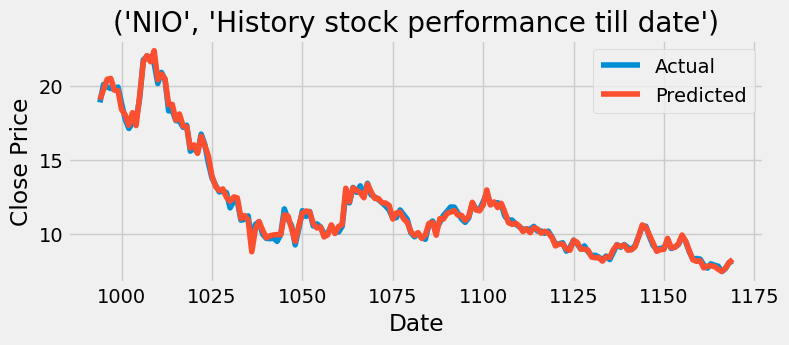

In [68]:
plt.figure(figsize=(8,3))
plt.plot(y_test, label='Actual')
plt.plot(y_test.index, predicted, label='Predicted')
plt.gca().set(title=title, xlabel='Date', ylabel='Close Price')
plt.legend()
plt.show()

In [69]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error (MAE): 0.17502421992402534
Mean Squared Error (MSE) : 0.05118939351067888
Root Mean Squared Error (RMSE): 0.22625073151412986


In [72]:
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
994,18.870001,19.056863
995,20.080000,19.735403
996,19.920000,20.431972
997,19.809999,20.490776
998,19.830000,19.697528
999,19.910000,19.661780
1000,18.790001,18.390125
1001,17.730000,18.019115
1002,17.110001,17.334044
1003,17.480000,18.176331


In [74]:
dfr.describe()

,Actual_Price,Predicted_Price
count,176.000000,176.000000
mean,11.812841,11.831194
std,3.502265,3.551978
min,7.450000,7.458581
25%,9.465000,9.504017
50%,10.715000,10.705057
75%,12.512500,12.437958
max,21.969999,22.369833


In [73]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.84487533892653


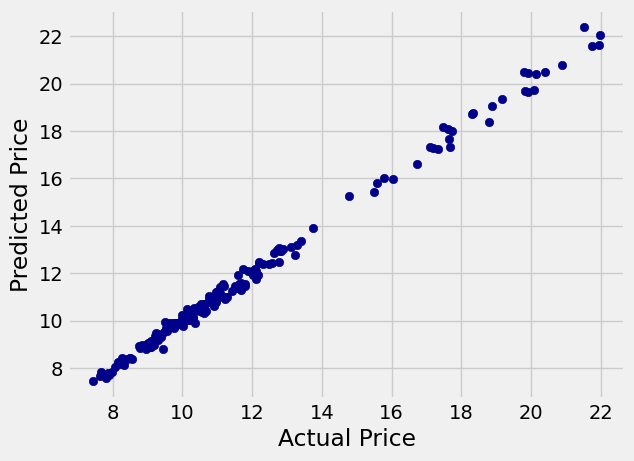

In [75]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()